error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:2757: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 2 && M0.cols == 3 in function 'cv::warpAffine'


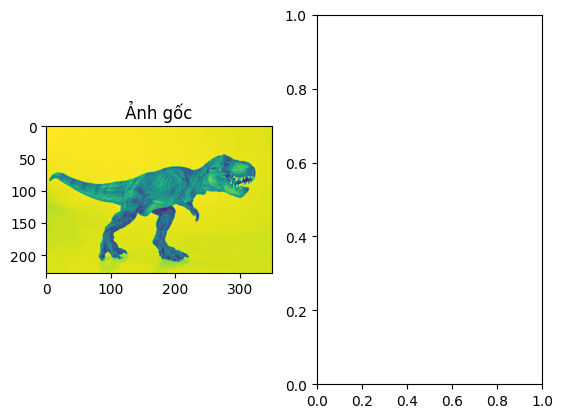

In [4]:
#1b
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
def xoay_anh(image,degree):
  theta=-degree*math.pi/180
  (h,w)=image.shape[:2]
  MT1=np.float32([[1, 0, 2*w//3], [0, 1, h//2]
                  ,[0, 0, 1]])
  MR=M=np.float32([[math.cos(theta), -math.sin(theta), 2*w//3 ], [math.sin(theta), math.cos(theta), h//2],
                  [0, 0, 1]])
  MT2=np.float32([[math.cos(theta), -math.sin(theta), 0],[math.sin(theta),
                    math.cos(theta), 0],[0,0,1]])
  M=MT1@MR@MT2
  return cv2.warpAffine(image, M,(w,h))
img=cv2.imread('./trex.png',0)
fig=plt.figure()
ax1,ax2=fig.subplots(1,2)
ax1.imshow(img)
ax1.set_title("Ảnh gốc")
rotated=xoay_anh(img,20)
ax2.imshow(rotated)
ax2.set_title("Ảnh xoay")
plt.show()

In [3]:
#cau2
import matplotlib.pyplot as plt
import cv2
class caithien_anh():
    def __init__(self,img) -> None:
        self.img=img
    def select_transform(self,name:str, **kwargs):
        if name=='gamma':
            return self.gamma_transform(**kwargs)
        else: 
            return self.img
    def gamma_transform(self, gamma:float, c=1):
        return float(c)*pow(self.img,gamma)
if __name__ == 'main':
    img=cv2.imread('./test2.tif')
    fig=plt.figure(figsize=(16,9))
    ax=fig.subplots(2,4)
    ax[0,0].imshow(img, cmap='gray')
    ax[0,0].set_title("Ảnh gốc")
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    ax[0,1].plot(hist, color='k')
    ax[0,1].set_title("Histogram ảnh gốc")
    gamma_value = 0.5
    gamma_img = caithien_anh(img,0.5)
    ax[1,0].imshow(gamma_img, cmap='gray')
    ax[1,0].set_title("Gamma")
    hist_gamma = cv2.calcHist([gamma_img], [0], None, [256], [0,256])
    ax[1,1].plot(hist_gamma, color='k')
    ax[1,1].set_title("Histogram gamma")
    plt.show()



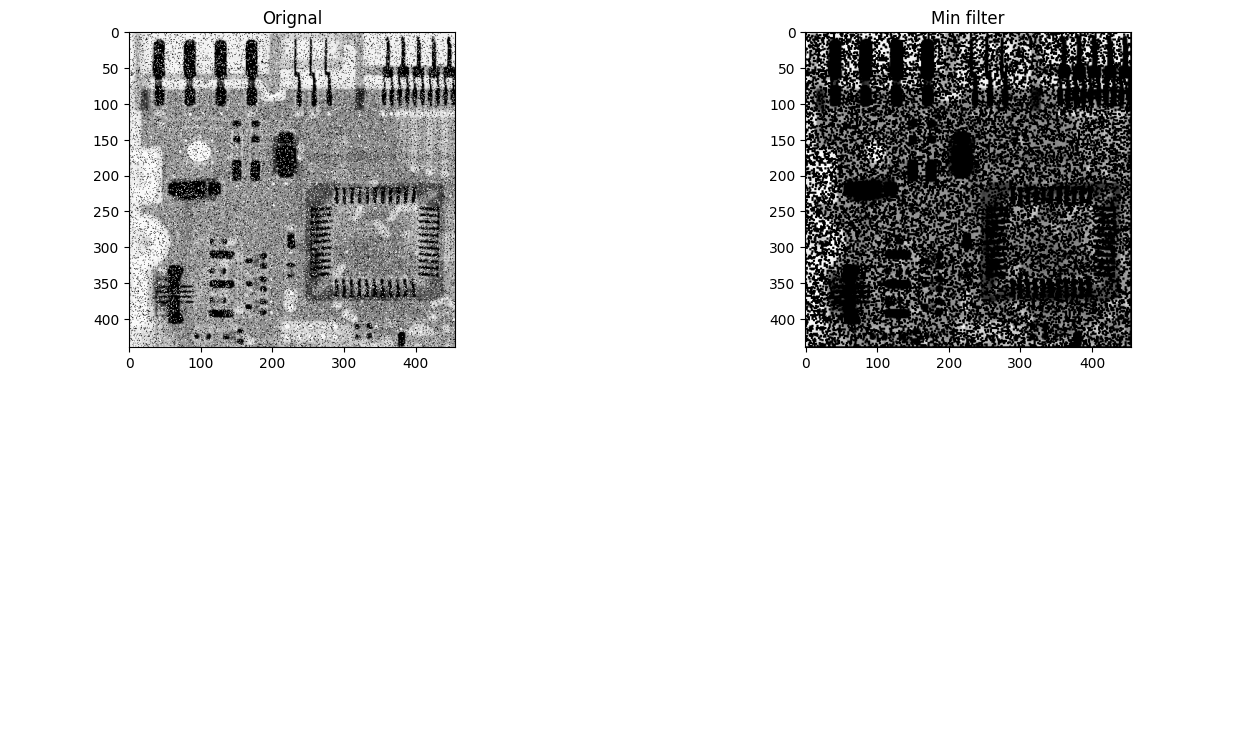

In [1]:
#cau3
import matplotlib.pyplot as plt
import cv2
import numpy as np
class lowpass_filter (object):
    def __init__ (self, image, convolution=None ) -> None :
        self.img=image
        self.convolution=convolution
        if convolution==True:
            self.init_kernel()

    def filtering_Max_Min (self, name : str ):
        if name == 'max':
            filter_value = lambda *args: max (*args )
        elif name =='min':
            filter_value = lambda * args: min (*args )
        else: return self.img
        m, n = self.img.shape
        img_new = np. zeros ([m, n])
        for i in range (1, m - 1):
            for j in range (1, n - 1):
                temp = [ self . img [i - 1, j - 1],
                            self . img [i - 1, j],
                            self . img [i - 1, j + 1],
                            self . img [i, j - 1],
                            self . img [i, j],
                            self . img [i, j + 1],
                            self . img [i + 1, j - 1],
                            self . img [i + 1, j],
                            self . img [i + 1, j + 1]]

                temp = filter_value ( temp )
                img_new [i, j] = temp
        return img_new
if __name__ == '__main__':
    image = cv2.imread ('./test2.tif', 0)
    fig = plt.figure ( figsize =(16, 9))
    ax= fig.subplots (2,2)
    ax[0,0].imshow(image,cmap ="gray")
    ax[0,0].set_title ("Orignal")
    img_objectnew = lowpass_filter (image )
    ax[0,1].imshow (img_objectnew.filtering_Max_Min ('min'),cmap ="gray")
    ax[0,1].set_title ("Min filter")
    ax[1,0].axis("off")
    ax[1,1].axis("off")
    plt.show ()